In [1]:
%pip install human-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

from hulearn.datasets import load_titanic
from sklearn.model_selection import GridSearchCV

In [3]:
df = load_titanic(as_frame=True)
X, y = df.drop(columns=['survived']), df['survived']

In [4]:
df.head()

,survived,pclass,name,sex,age,fare,sibsp,parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0


define a rule based function that says above a certian threshold of fare payed people had more chances to survive, so they survived

## Function

In [5]:
def fare_based(dataf, threshold=10):
    return np.array(dataf['fare'] > threshold).astype(int)

In [6]:
fare_based(X)

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,

the issue is this is a function, something that scikit learn doesn't accept as a classifier that means we can not use this in a classifier or a pipeline

Luckily we can use this tool from human learn to address this

## Function Classifier

it converts any function that i write to scikit learn compatible classifier

In [7]:
from hulearn.classification import FunctionClassifier

mod = FunctionClassifier(fare_based, threshold=10)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer

grid = GridSearchCV(mod,
                   cv=2,
                   param_grid={'threshold': np.linspace(0,100, 30)},
                   scoring = {'accuracy': make_scorer(accuracy_score),
                              'precision': make_scorer(precision_score),
                              'recall': make_scorer(recall_score)},
                   refit='accuracy'
                )
grid.fit(X, y)

GridSearchCV(cv=2,
             estimator=FunctionClassifier(func=<function fare_based at 0x000001E45961DB20>,
                                          threshold=10),
             param_grid={'threshold': array([  0.        ,   3.44827586,   6.89655172,  10.34482759,
        13.79310345,  17.24137931,  20.68965517,  24.13793103,
        27.5862069 ,  31.03448276,  34.48275862,  37.93103448,
        41.37931034,  44.82758621,  48.27586207,  51.72413793,
        55.17241379,  58.62068966,  62.06896552,  65.51724138,
        68.96551724,  72.4137931 ,  75.86206897,  79.31034483,
        82.75862069,  86.20689655,  89.65517241,  93.10344828,
        96.55172414, 100.        ])},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

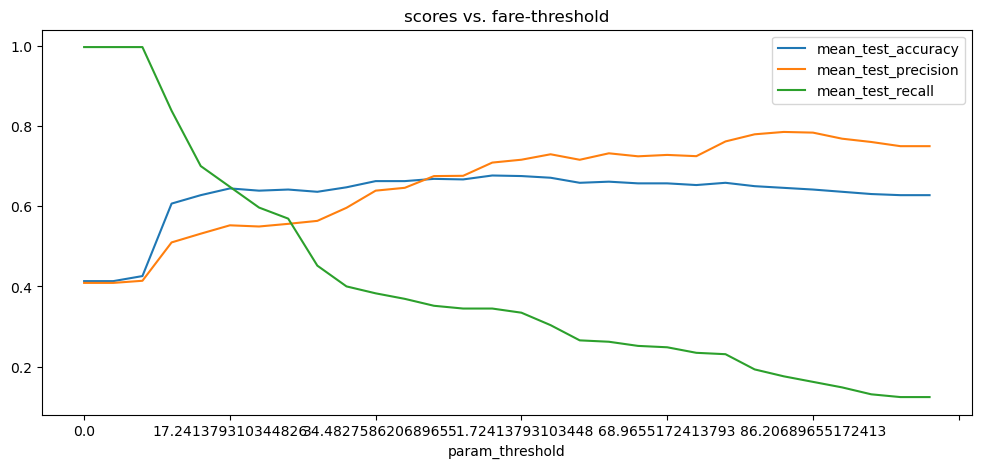

In [9]:
score_df = (pd.DataFrame(grid.cv_results_)
  .set_index('param_threshold')
  [['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall']])

score_df.plot(figsize=(12, 5), title="scores vs. fare-threshold");


## Fallback
In machine learning you typically want to do more than just apply a model. It's likely that you'll also want to have a fallback ready in situations where your machine learning model isn't confident.

In [ ]:
import numpy as np
from hulearn.classification import FunctionClassifier

# These two models are assumed to be trained beforehand.
outlier    = WhatEverOutlierDetector().fit(X, y)
classifier = WhatEverClassifier().fit(X, y)

def make_decision(dataf, proba_threshold=0.8):
    # First we create a resulting array with all the predictions
    res = classifier.predict(dataf)

    # If we detect doubt, "classify" it as a fallback instead.
    proba = classifier.predict_proba(dataf)
    res = np.where(proba.max(axis=1) < proba_threshold, "doubt_fallback", res)

    # If we detect an outlier, we'll fallback too.
    res = np.where(outlier.predict(dataf) == -1, "outlier_fallback", res)

    # This `res` array contains the output of the drawn diagram.
    return res

fallback_model = FunctionClassifier(make_decision, proba_threshold=0.8)


## Draw
You can use human-learn to literally draw a machine learning model

In [12]:
from sklego.datasets import load_penguins
from hulearn.experimental.interactive import InteractiveCharts

df = load_penguins(as_frame=True).dropna()

In [20]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


Let's make interactive charts

In [21]:
from hulearn.experimental.interactive import InteractiveCharts

clf = InteractiveCharts(df, labels="species")

Loading BokehJS ...

In [22]:
# Run this in a seperate cell.
clf.add_chart(x="bill_length_mm", y="bill_depth_mm")

In [23]:
# Run this in a seperate cell.
clf.add_chart(x="flipper_length_mm", y="body_mass_g")

In [24]:
clf.data

<bound method InteractiveCharts.data of <hulearn.experimental.interactive.InteractiveCharts object at 0x000001E45DC859D0>>

This allows you to draw polygons that could function as a classification model.

In [17]:
from hulearn.classification import InteractiveClassifier

model = InteractiveClassifier(json_desc=clf.data())

In [25]:
X, y = df.drop(columns=['species']), df['species']
# The `.fit(X, y)` is a formality form scikit-learn.
# It isn't "learning" anything when you run that code.
preds = model.fit(X, y).predict_proba(X)

These preds can be plotted via;

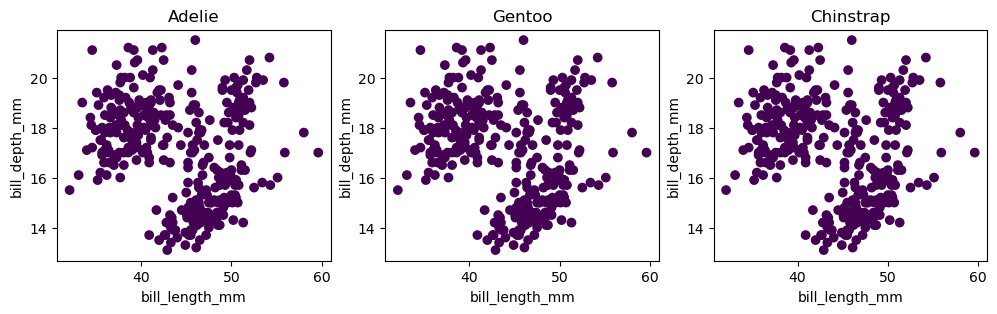

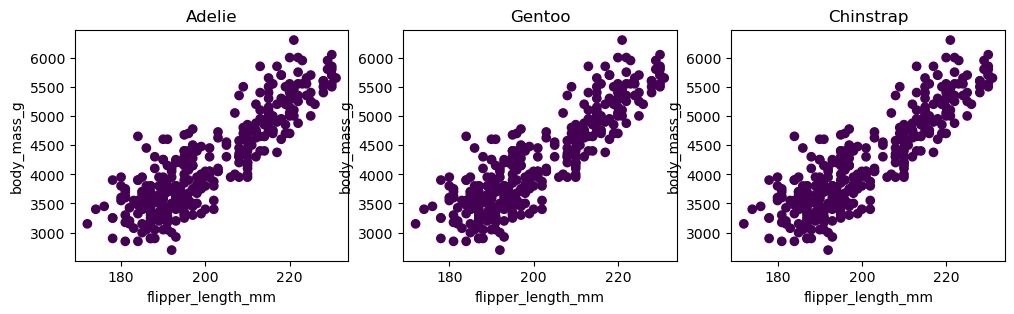

In [26]:
import matplotlib.pylab as plt

plt.figure(figsize=(12, 3))
for i in range(3):
    plt.subplot(131 + i)
    plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=preds[:, i])
    plt.xlabel('bill_length_mm')
    plt.ylabel('bill_depth_mm')
    plt.title(model.classes_[i])

import matplotlib.pylab as plt

plt.figure(figsize=(12, 3))
for i in range(3):
    plt.subplot(131 + i)
    plt.scatter(X['flipper_length_mm'], X['body_mass_g'], c=preds[:, i])
    plt.xlabel('flipper_length_mm')
    plt.ylabel('body_mass_g')
    plt.title(model.classes_[i])